In [680]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [681]:
df = pd.read_csv('/Users/jessiefreelander/Flatiron_labs/Git_lab_projects/Phase_1_proj/Phase-1-Project/Phase-1-Project/Phase-1-Project/Phase-1-Project/Phase-1-Project/Phase-1-Project/Clean Data Only/Acessable_Cleaned_Data_Aviation.csv', index_col= 'Event Date')

In [682]:
df.columns

Index(['Unnamed: 0', 'Investigation Type', 'Location', 'Country',
       'Airport Name', 'Injury Severity', 'Aircraft Damage', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Total Passengers', 'Make-Model'],
      dtype='object')

In [683]:
df=df.drop(['Unnamed: 0'], axis=1)

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1427 entries, 1982-01-03 to 2022-12-01
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation Type      1427 non-null   object 
 1   Location                1427 non-null   object 
 2   Country                 1427 non-null   object 
 3   Airport Name            1427 non-null   object 
 4   Injury Severity         1427 non-null   object 
 5   Aircraft Damage         1427 non-null   object 
 6   Make                    1427 non-null   object 
 7   Model                   1427 non-null   object 
 8   Amateur Built           1427 non-null   object 
 9   Number Of Engines       1427 non-null   float64
 10  Engine Type             1427 non-null   object 
 11  Purpose Of Flight       1427 non-null   object 
 12  Total Fatal Injuries    1427 non-null   float64
 13  Total Serious Injuries  1427 non-null   float64
 14  Total Minor Injuries    1427 n

In [685]:
#Let's create new columns showing the rate of fatalities, serious injuries, minor injuries, and no injuries
df['Fatal Injury Ratio'] = (df['Total Fatal Injuries']) / (df['Total Passengers'])
df['Serious Injury Ratio'] = (df['Total Serious Injuries']) / (df['Total Passengers'])
df['Minor Injury Ratio'] = (df['Total Minor Injuries']) / (df['Total Passengers'])
df['Uninjured Ratio'] = (df['Total Uninjured']) / (df['Total Passengers'])

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1427 entries, 1982-01-03 to 2022-12-01
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation Type      1427 non-null   object 
 1   Location                1427 non-null   object 
 2   Country                 1427 non-null   object 
 3   Airport Name            1427 non-null   object 
 4   Injury Severity         1427 non-null   object 
 5   Aircraft Damage         1427 non-null   object 
 6   Make                    1427 non-null   object 
 7   Model                   1427 non-null   object 
 8   Amateur Built           1427 non-null   object 
 9   Number Of Engines       1427 non-null   float64
 10  Engine Type             1427 non-null   object 
 11  Purpose Of Flight       1427 non-null   object 
 12  Total Fatal Injuries    1427 non-null   float64
 13  Total Serious Injuries  1427 non-null   float64
 14  Total Minor Injuries    1427 n

In [687]:
df['Fatal Injury Ratio'].isna().value_counts()
df = df.dropna(subset='Fatal Injury Ratio', axis=0)

In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424 entries, 1982-01-03 to 2022-12-01
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation Type      1424 non-null   object 
 1   Location                1424 non-null   object 
 2   Country                 1424 non-null   object 
 3   Airport Name            1424 non-null   object 
 4   Injury Severity         1424 non-null   object 
 5   Aircraft Damage         1424 non-null   object 
 6   Make                    1424 non-null   object 
 7   Model                   1424 non-null   object 
 8   Amateur Built           1424 non-null   object 
 9   Number Of Engines       1424 non-null   float64
 10  Engine Type             1424 non-null   object 
 11  Purpose Of Flight       1424 non-null   object 
 12  Total Fatal Injuries    1424 non-null   float64
 13  Total Serious Injuries  1424 non-null   float64
 14  Total Minor Injuries    1424 n

In [689]:
#let's make a new safety dataframe with our safety indicators
safety_df = df[['Injury Severity','Make', 'Fatal Injury Ratio', 'Uninjured Ratio', 'Engine Type']]
safety_df = safety_df.set_index('Make')

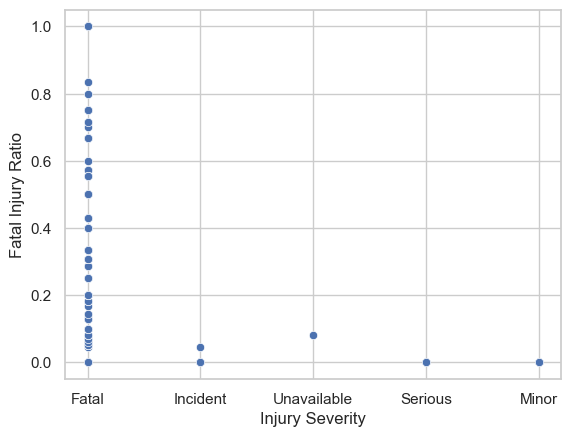

In [690]:
#This makes sense. There should be more injury severity based on the fatality rate
sns.scatterplot(x= 'Injury Severity', y= 'Fatal Injury Ratio', data= safety_df)
plt.show()

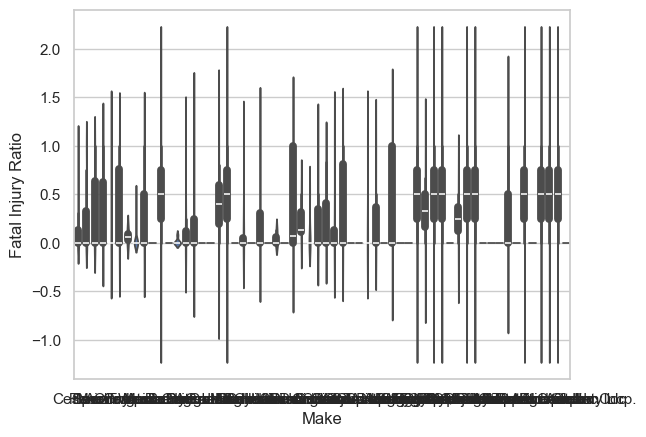

In [691]:
sns.violinplot(x= 'Make', y= 'Fatal Injury Ratio', data= df)
plt.show()

In [692]:
df_fatalities = df[['Fatal Injury Ratio', 'Make-Model']]
df_fatalities.describe()

,Fatal Injury Ratio
count,1424.000000
mean,0.222668
std,0.390691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.181696
max,1.000000


There's a clear dimorphism of the Fatal Injury Ratio that clusters at 0 and at 1.

Text(0.5, 1.0, 'Fatal Injury Ratio By Make')

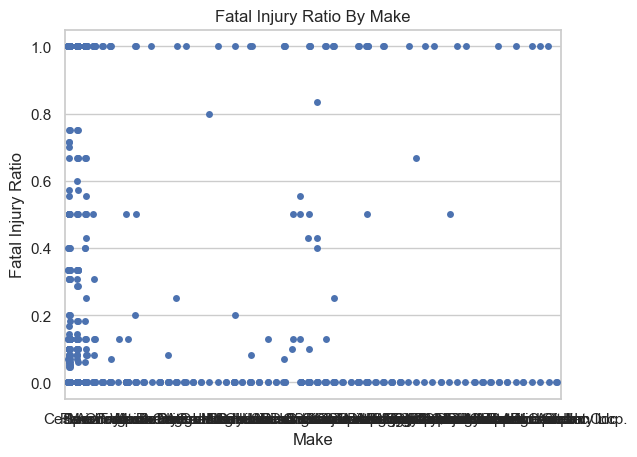

In [693]:
fig, ax = plt.subplots()
sns.stripplot(x='Make', y='Fatal Injury Ratio', data= df, ax=ax)
ax.set_title('Fatal Injury Ratio By Make')

The number of engines does not seem to effect the fatality ratio the way we thought it might. There's more makes with lower fatalities with only 1 engine. 

Text(0.5, 1.0, 'Fatal Injury Ratio By Make')

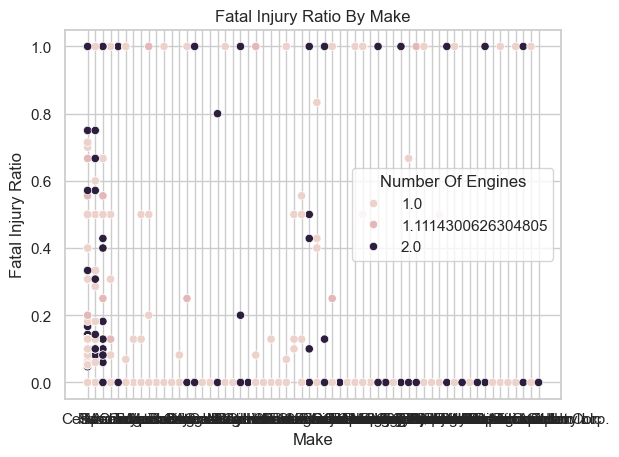

In [694]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Number Of Engines', data= df, ax=ax)
ax.set_title('Fatal Injury Ratio By Make')

There seems to be some correlation between the weather condition when it is VMC and lower fatality ratios.

Text(0.5, 1.0, 'Fatal Injury Ratio By Make')

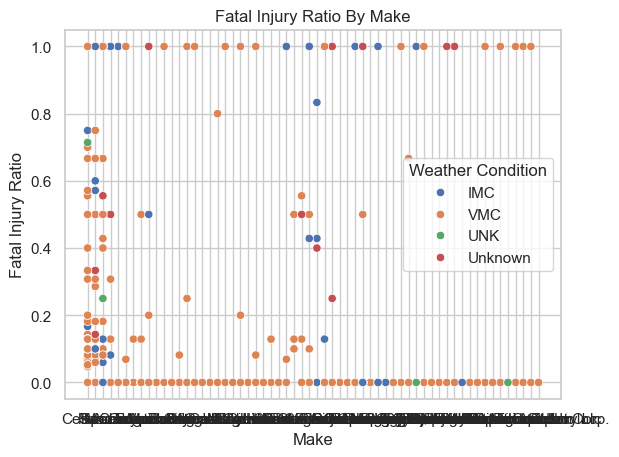

In [695]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Weather Condition', data= df, ax=ax)

ax.set_title('Fatal Injury Ratio By Make')

In [598]:
# Remove all unknown values in Broad Phase of Flight - it is affecting our results
df = df[df['Broad Phase Of Flight'] != 'Unknown']
df['Broad Phase Of Flight'].value_counts()

Broad Phase Of Flight
Landing        169
Takeoff        139
Cruise         119
Approach        71
Maneuvering     36
Taxi            35
Descent         26
Climb           20
Go-around       14
Other            2
Standing         1
Name: count, dtype: int64

There doesn't seem to be a pattern based on Broad Phase of Flight to show a difference higher and lower fatality ratios.

Text(0.5, 1.0, 'Fatal Injury Ratio By Make')

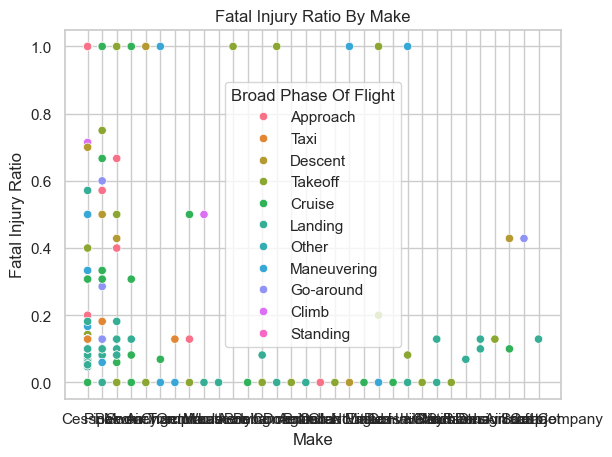

In [599]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Broad Phase Of Flight', data= df, ax=ax)

ax.set_title('Fatal Injury Ratio By Make')

In [600]:
safety_df = safety_df.reset_index()

In [601]:
#let's just plot the top ten most common makes so we can see the data better
top_ten_makes = ['Cessna', 'Piper', 'Beech', 'Grumman', 'Mooney', 'Cirrus Design Corp', 'Raytheon Aircraft Company', 'Air Tractor', 'Dehavilland', 'Cirrus']
top_ten_df = df[df['Make'].isin(top_ten_makes)]
top_ten_df = top_ten_df.sort_values('Make')
top_ten_df

,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,...,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model,Fatal Injury Ratio,Serious Injury Ratio,Minor Injury Ratio,Uninjured Ratio
Event Date,,,,,,,,,,,,,,,,,,,,,
1982-01-21,Accident,"DOS PALOS, CA",United States,SPAIN-AIR AIRPORT,Fatal,Substantial,Air Tractor,301,No,1.0,...,0.0,1.0,VMC,Takeoff,1.00000,Air Tractor 301,0.000000,0.000000,0.000000,1.000000
1982-05-14,Accident,"MCALLEN, TX",United States,AIRSTRIP,Fatal,Substantial,Air Tractor,301,No,1.0,...,0.0,0.0,VMC,Takeoff,1.00000,Air Tractor 301,0.000000,1.000000,0.000000,0.000000
2006-09-23,Accident,"BIG SPRING, TX",United States,Big Spring Municipal,Fatal,Substantial,Air Tractor,301,No,1.0,...,2.0,1.0,VMC,Cruise,6.44408,Air Tractor 301,0.068913,0.465544,0.310362,0.155181
1982-04-07,Accident,"EDNA, TX",United States,FLYING SERVICE INC.,Fatal,Substantial,Air Tractor,AT-400,No,1.0,...,0.0,1.0,VMC,Landing,1.00000,Air Tractor AT-400,0.000000,0.000000,0.000000,1.000000
1982-08-27,Accident,"ALVIN, TX",United States,Unknown,Fatal,Substantial,Air Tractor,AT-400,No,1.0,...,0.0,1.0,VMC,Maneuvering,1.00000,Air Tractor AT-400,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982-04-30,Incident,"ENTERPRISE, AL",United States,ENTERPRISE MUNICIPAL,Incident,Minor,Piper,PA-31-350,No,2.0,...,0.0,7.0,VMC,Takeoff,7.00000,Piper PA-31-350,0.000000,0.000000,0.000000,1.000000
1982-08-08,Accident,"BANDERA, TX",United States,Unknown,Fatal,Destroyed,Piper,PA-23-250,No,2.0,...,0.0,0.0,VMC,Cruise,1.00000,Piper PA-23-250,1.000000,0.000000,0.000000,0.000000
1982-05-20,Accident,"SALEM, MO",United States,Unknown,Fatal,Substantial,Piper,PA-25-235,No,1.0,...,0.0,1.0,VMC,Landing,1.00000,Piper PA-25-235,0.000000,0.000000,0.000000,1.000000


Narrow it down to the Makes that more than 20 values each, anything less than that will be removed because anything less than 20 will be difficult to extract accurate statistical analyses from. This gives us the top 5 makes.

In [602]:
top_five_makes = ['Cessna', 'Piper', 'Beech', 'Grumman', 'Mooney']
filtered_df = top_ten_df[top_ten_df['Make'].isin(top_five_makes)]
filtered_df['Make'].value_counts()

Make
Cessna     284
Piper      166
Beech       72
Grumman     28
Mooney      12
Name: count, dtype: int64

In [603]:
filtered_df = filtered_df[filtered_df['Weather Condition'] != 'UNK']
filtered_df['Weather Condition'].value_counts()

Weather Condition
VMC    465
IMC     86
Name: count, dtype: int64

Grumman Aircrafts have the lowest fatality ratio at less than 10 percent with Cessna and Piper following behind it.

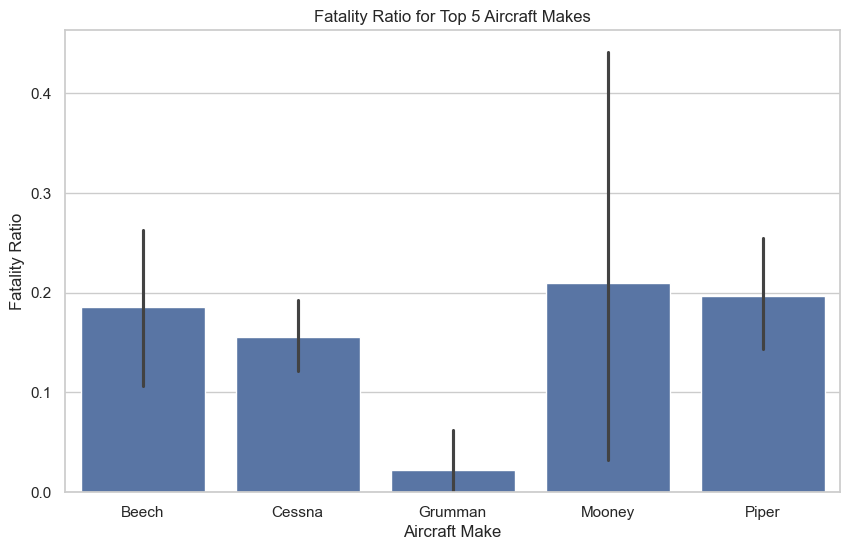

In [604]:
plt.figure(figsize=(10,6))
sns.barplot(x='Make', y='Fatal Injury Ratio', data= filtered_df)
plt.xlabel('Aircraft Make')
plt.ylabel('Fatality Ratio')
plt.title('Fatality Ratio for Top 5 Aircraft Makes')
plt.show()

The distribution of data lies around Substantial Damage more than anything else

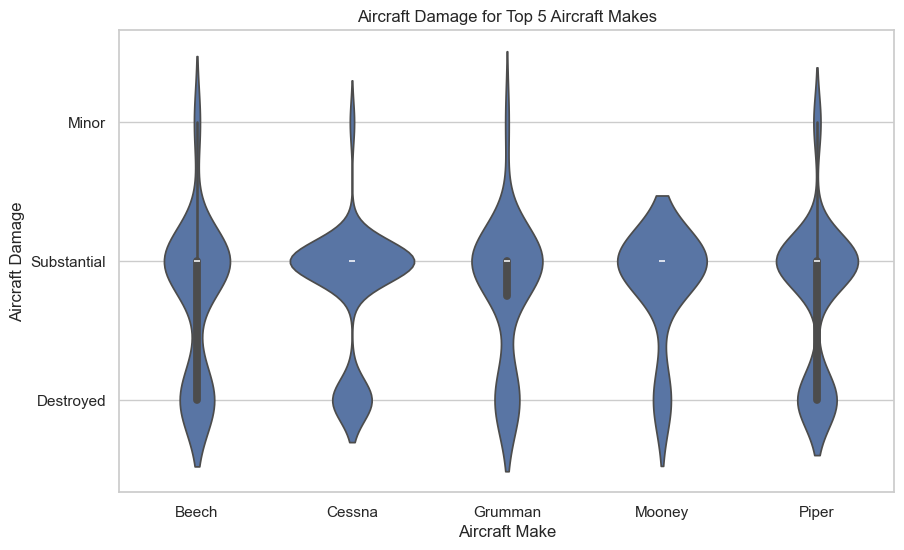

In [605]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Make', y='Aircraft Damage', data= filtered_df)
plt.xlabel('Aircraft Make')
plt.ylabel('Aircraft Damage')
plt.title('Aircraft Damage for Top 5 Aircraft Makes')
plt.show()

In [606]:
# Let's look at how average fatality rate changes based on phase of flight
filtered_df.set_index('Make-Model')
broad_phase_fatality_df = filtered_df[['Broad Phase Of Flight', 'Fatal Injury Ratio']].groupby('Broad Phase Of Flight').mean() 
broad_phase_fatality_df

,Fatal Injury Ratio
Broad Phase Of Flight,
Approach,0.345670
Climb,0.333097
Cruise,0.228295
Descent,0.129044
Go-around,0.318738
Landing,0.028849
Maneuvering,0.311098
Other,0.000000
Standing,0.000000


Highest Average Fatality Ratio is happening in Approach, Climb, Maneuvering, Cruise and Go-Around Phases.
The lowest average fatalities are happening in the Standing, Landing, and Taxi Phases.
IMC Weather Conditions are more often present with Higher Average Fatality Rate while VMC are present with lower average fatality rates

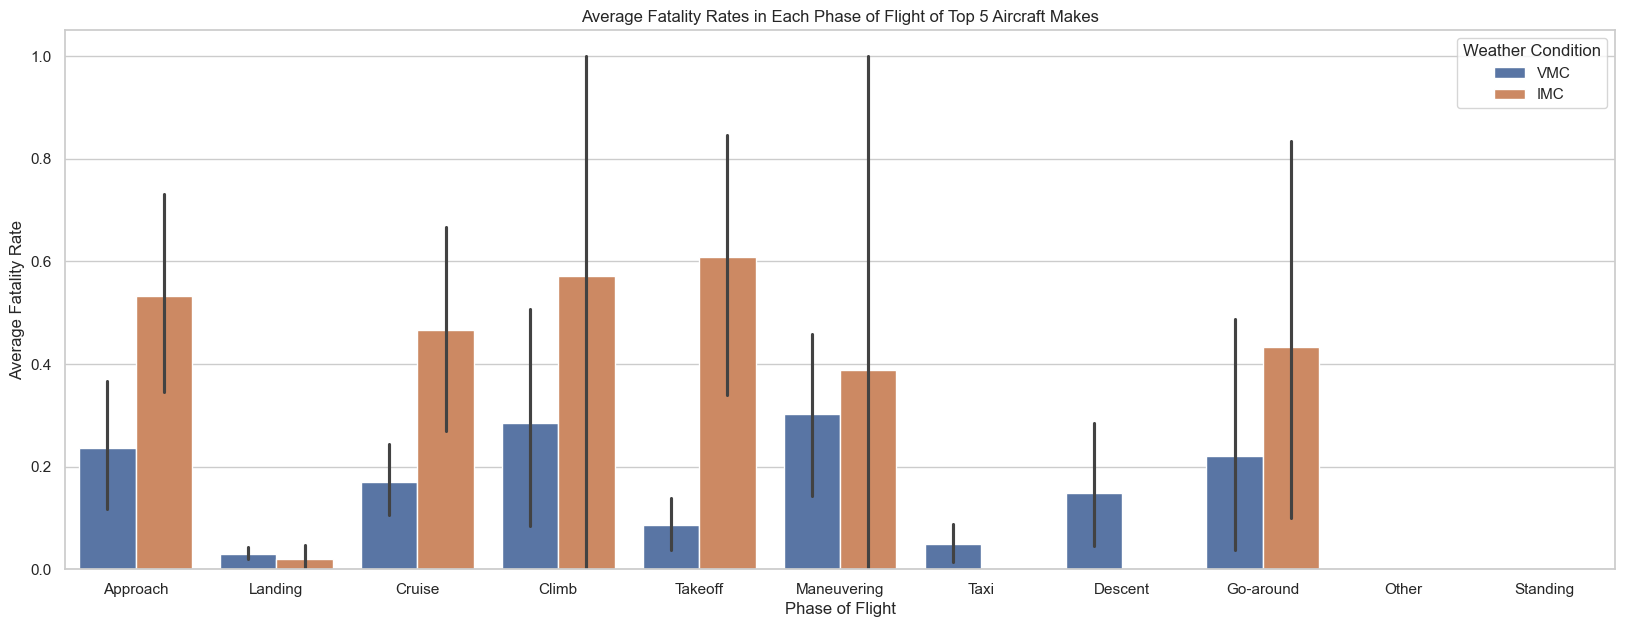

In [607]:
plt.figure(figsize=(20,7))
sns.barplot(x='Broad Phase Of Flight', y= 'Fatal Injury Ratio', hue= 'Weather Condition', data= filtered_df)
plt.xlabel('Phase of Flight')
plt.ylabel('Average Fatality Rate')
plt.title('Average Fatality Rates in Each Phase of Flight of Top 5 Aircraft Makes')
plt.show()

In [608]:
# Creating the Risk Index to measure risk of a specific Make & Model
## Risk Index Indicators: Average Fatality Rate, Average Fatality with Substantial Aircraft Damage, 
## Median Uninjured Rate, and Average Minor Injury Rate
### I will take these risk indicators and create a function that assesses risk by conditionals set around the stats
filtered_df

,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,...,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model,Fatal Injury Ratio,Serious Injury Ratio,Minor Injury Ratio,Uninjured Ratio
Event Date,,,,,,,,,,,,,,,,,,,,,
1982-09-01,Accident,"PLAINVIEW, TX",United States,HALE COUNTY,Fatal,Minor,Beech,95-C55,No,2.0,...,0.0,2.0,VMC,Approach,2.00000,Beech 95-C55,0.000000,0.000000,0.0,1.000000
1984-03-14,Accident,"MYRTLE BEACH, SC",United States,GRAND STRAND,Fatal,Substantial,Beech,99,No,2.0,...,0.0,1.0,VMC,Landing,2.44408,Beech 99,0.181696,0.409152,0.0,0.409152
1982-03-16,Accident,"TUCSON, AZ",United States,Unknown,Fatal,Destroyed,Beech,58,No,2.0,...,0.0,0.0,VMC,Cruise,1.00000,Beech 58,1.000000,0.000000,0.0,0.000000
1982-03-14,Accident,"MCALLEN, TX",United States,MILLER INTERNATIONAL,Fatal,Destroyed,Beech,C-45H,No,2.0,...,0.0,0.0,VMC,Climb,1.00000,Beech C-45H,1.000000,0.000000,0.0,0.000000
1982-03-13,Accident,"BRYAN, OH",United States,BRYAN-WILLIANS CO.,Fatal,Substantial,Beech,200,No,2.0,...,0.0,4.0,VMC,Landing,4.00000,Beech 200,0.000000,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982-08-04,Accident,"RALEIGH, NC",United States,RALEIGH DURHAM MUNICIPAL,Fatal,Destroyed,Piper,PA-32-260,No,1.0,...,0.0,0.0,VMC,Takeoff,1.00000,Piper PA-32-260,0.000000,1.000000,0.0,0.000000
1982-03-17,Accident,"FARMINGTON, NM",United States,Unknown,Fatal,Substantial,Piper,PA-38-112,No,1.0,...,1.0,0.0,VMC,Cruise,1.00000,Piper PA-38-112,0.000000,0.000000,1.0,0.000000
1982-04-30,Incident,"ENTERPRISE, AL",United States,ENTERPRISE MUNICIPAL,Incident,Minor,Piper,PA-31-350,No,2.0,...,0.0,7.0,VMC,Takeoff,7.00000,Piper PA-31-350,0.000000,0.000000,0.0,1.000000


In [609]:
# Take the groupby mean of uninjured rates for each make-model; 
filtered_df[['Uninjured Ratio', 'Make-Model']].groupby('Make-Model').mean()

,Uninjured Ratio
Make-Model,
Beech 200,0.595238
Beech 35,1.000000
Beech 36,0.500000
Beech 56TC,1.000000
Beech 58,0.664291
...,...
Piper PA-38-112,0.500000
Piper PA-44-180,0.000000
Piper PA-60,1.000000


In [610]:
#Let's use this column to start our risk_index_df which will consist of all the risk indicators
risk_index_df = filtered_df[['Uninjured Ratio', 'Make-Model']].groupby('Make-Model').mean()
risk_index_df.rename(columns={"Uninjured Ratio": "Average Uninjured Rate"}, inplace=True)
risk_index_df

second = filtered_df[['Fatal Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
risk_index_df['Average Fatality Rate'] = second['Fatal Injury Ratio']

# Calculate the average fatality rate when there is Substantial damage to the aircraft
substantial_damage_df = filtered_df[filtered_df['Aircraft Damage'] == 'Substantial']
substantial_damage_df
third = substantial_damage_df[['Fatal Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()

# Add this column to the risk index df
risk_index_df['Average Fatality Rate w/ Substantial Damage'] = third

# Calculate the average minor injury rate 
fourth = filtered_df[['Minor Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
fourth

risk_index_df['Average Minor Injury Rate'] = fourth
risk_index_df

fifth = filtered_df[['Serious Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
fifth

risk_index_df['Average Serious Injury Rate'] = fifth

In [611]:
risk_index_df['Average Fatality Rate w/ Substantial Damage'].isna().value_counts()


Average Fatality Rate w/ Substantial Damage
False    162
True      18
Name: count, dtype: int64

In [612]:
# Because we only looked at the Substantial Damage values there are some mising values in the second column
risk_index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, Beech 200 to Piper PA31-350
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Average Uninjured Rate                       180 non-null    float64
 1   Average Fatality Rate                        180 non-null    float64
 2   Average Fatality Rate w/ Substantial Damage  162 non-null    float64
 3   Average Minor Injury Rate                    180 non-null    float64
 4   Average Serious Injury Rate                  180 non-null    float64
dtypes: float64(5)
memory usage: 8.4+ KB


In [613]:
## lets try to impute these missing values with the mean.
print(risk_index_df['Average Fatality Rate w/ Substantial Damage'].mean())
print(risk_index_df['Average Fatality Rate w/ Substantial Damage'].median())

risk_index_df['Average Fatality Rate w/ Substantial Damage']= risk_index_df['Average Fatality Rate w/ Substantial Damage'].fillna(risk_index_df['Average Fatality Rate w/ Substantial Damage'].mean())
risk_index_df['Average Fatality Rate w/ Substantial Damage'].isna().value_counts()


0.038535763499272166
0.0


Average Fatality Rate w/ Substantial Damage
False    180
Name: count, dtype: int64

In [614]:
risk_index_df['Average Uninjured Rate'] = (risk_index_df['Average Uninjured Rate'] - risk_index_df['Average Uninjured Rate'].min()) /(risk_index_df['Average Uninjured Rate'].max() - risk_index_df['Average Uninjured Rate'].min())
risk_index_df['Average Fatality Rate'] = (risk_index_df['Average Fatality Rate'] - risk_index_df['Average Fatality Rate'].min()) / (risk_index_df['Average Fatality Rate'].max() - risk_index_df['Average Fatality Rate'].min())
risk_index_df['Average Fatality Rate w/ Substantial Damage'] = (risk_index_df['Average Fatality Rate w/ Substantial Damage'] - risk_index_df['Average Fatality Rate w/ Substantial Damage'].min()) / (risk_index_df['Average Fatality Rate w/ Substantial Damage'].max() - risk_index_df['Average Fatality Rate w/ Substantial Damage'].min())

risk_index_df['Average Minor Injury Rate'] = (risk_index_df['Average Minor Injury Rate'] - risk_index_df['Average Minor Injury Rate'].min()) / (risk_index_df['Average Minor Injury Rate'].max() - risk_index_df['Average Minor Injury Rate'].min())

risk_index_df['Average Serious Injury Rate'] = (risk_index_df['Average Serious Injury Rate'] - risk_index_df['Average Serious Injury Rate'].min()) / (risk_index_df['Average Serious Injury Rate'].max() - risk_index_df['Average Serious Injury Rate'].min())


In [615]:
# Our risk index dataframe is built. We will be using this dataframe to input values into our risk index function which will assess
## the risk level as High, Medium, or Low, based on the given conditions.

risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate
Make-Model,,,,,
Beech 200,0.595238,0.309524,0.428571,0.047619,0.047619
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000
Beech 36,0.500000,0.000000,0.000000,0.000000,0.500000
Beech 56TC,1.000000,0.000000,0.000000,0.000000,0.000000
Beech 58,0.664291,0.214275,0.166642,0.089288,0.032145
...,...,...,...,...,...
Piper PA-38-112,0.500000,0.000000,0.000000,0.500000,0.000000
Piper PA-44-180,0.000000,0.500000,0.000000,0.250000,0.250000
Piper PA-60,1.000000,0.000000,0.000000,0.000000,0.000000


In [616]:
## we will use the average of the overall values to set our conditions for risk
print(filtered_df['Uninjured Ratio'].mean())
print(filtered_df['Serious Injury Ratio'].mean())
print(filtered_df['Minor Injury Ratio'].mean())
print(filtered_df['Fatal Injury Ratio'].mean())
print(substantial_damage_df['Fatal Injury Ratio'].mean())

0.599524005880406
0.10481683790905061
0.1298008533713985
0.16585830283914496
0.03997027642757493


In [617]:
#Have the function take in a make_model in string form and the dataframe
##### 
#####
def risk_index(make_model, risk_index_df):
    # Find the row corresponding to the given Make-Model
    row = risk_index_df.loc[make_model]
   
    if row.empty:
        return "Make-Model not found"

    avg_fatality_rate = row['Average Fatality Rate']
    avg_serious_injury_rate = row['Average Serious Injury Rate']
    avg_fatality_substantial_damage = row['Average Fatality Rate w/ Substantial Damage']
    avg_uninjured_rate = row['Average Uninjured Rate']
    avg_minor_injury = row['Average Minor Injury Rate']
    
    count = 0
    # Apply the risk conditions
    if avg_fatality_rate > .17:
        count += 1
    if avg_serious_injury_rate > .10:
        count += 1
    if avg_fatality_substantial_damage > .03:
        count += 1
    if avg_uninjured_rate < .6:
        count += 1
    if avg_minor_injury < .13:
        count += 1

    # Determine risk level based on count
    if count >= 4:
        return "High Risk"
    elif count == 3:
        return "Medium Risk"
    else:
        return "Low Risk"


In [618]:
risk_index_df['Risk Index'] = risk_index_df.apply(lambda row: risk_index(row.name, risk_index_df), axis=1)

In [619]:
# An initial look at our risk index shows that something in the data has skewed the results to be low risk. 
## Let's look into the data a bit more and see what might be causing this. We may need to normalize or standardize
### the data and possibly give the conditions different weights.
risk_index_df['Risk Index'].value_counts()

Risk Index
Low Risk       97
Medium Risk    50
High Risk      33
Name: count, dtype: int64

In [620]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index
Make-Model,,,,,,
Beech 200,0.595238,0.309524,0.428571,0.047619,0.047619,High Risk
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk
Beech 36,0.500000,0.000000,0.000000,0.000000,0.500000,Medium Risk
Beech 56TC,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk
Beech 58,0.664291,0.214275,0.166642,0.089288,0.032145,Medium Risk
...,...,...,...,...,...,...
Piper PA-38-112,0.500000,0.000000,0.000000,0.500000,0.000000,Low Risk
Piper PA-44-180,0.000000,0.500000,0.000000,0.250000,0.250000,Medium Risk
Piper PA-60,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk


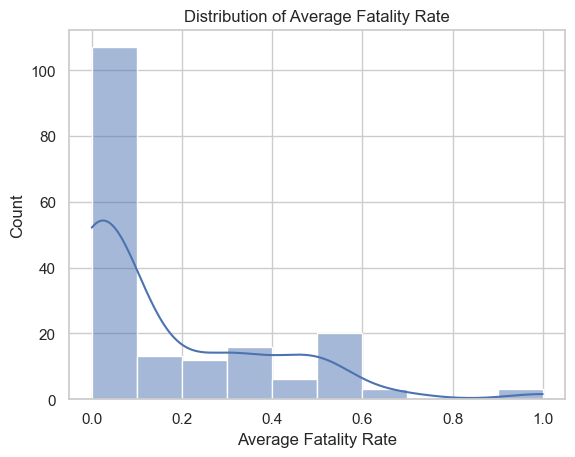

In [621]:
## There are a lot of 0 values for the average fatality rate. Maybe we can give this 
## indicator less weight, or figure out how to standardize the data better when
## building the risk index function
sns.histplot(risk_index_df['Average Fatality Rate'], bins=10, kde=True)
plt.title('Distribution of Average Fatality Rate')
plt.show()

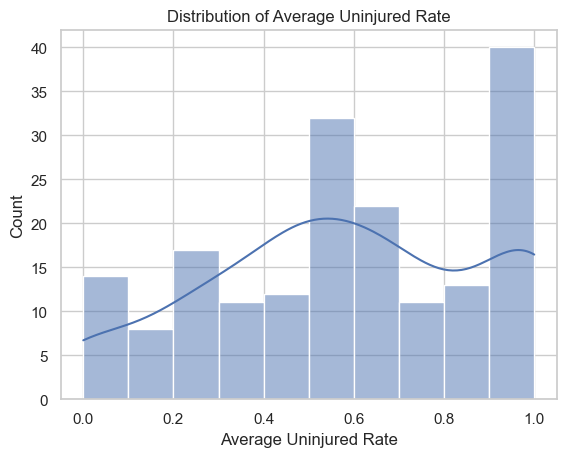

In [622]:
## Most of the values fall around 50% uninjured, we might be able to give this more weight
sns.histplot(risk_index_df['Average Uninjured Rate'], bins=10, kde=True)
plt.title('Distribution of Average Uninjured Rate')
plt.show()

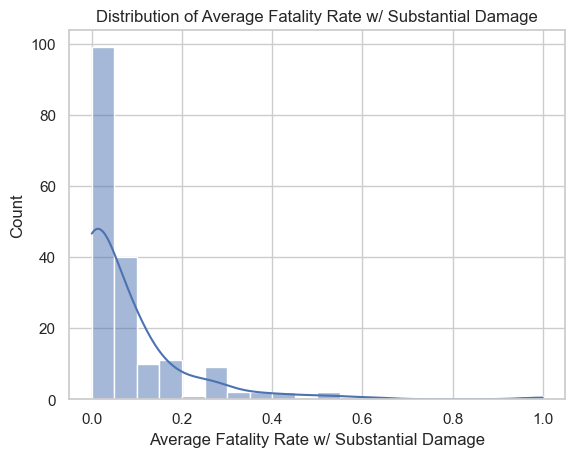

In [623]:
## Again the distribution is skewed to have a low avg fatality rate w substantial damage, we may need to give 
## this less weight in our risk index
sns.histplot(risk_index_df['Average Fatality Rate w/ Substantial Damage'], bins=20, kde=True)
plt.title('Distribution of Average Fatality Rate w/ Substantial Damage')
plt.show()

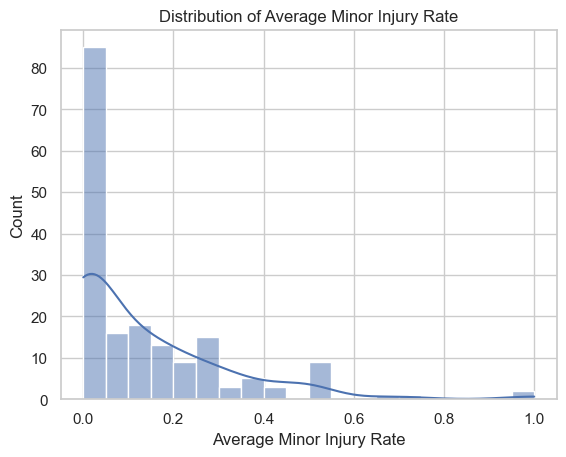

In [624]:
## we may be able to give this more weight in the index, since there is less data showing high rates of minor injuries
sns.histplot(risk_index_df['Average Minor Injury Rate'], bins=20, kde=True)
plt.title('Distribution of Average Minor Injury Rate')
plt.show()

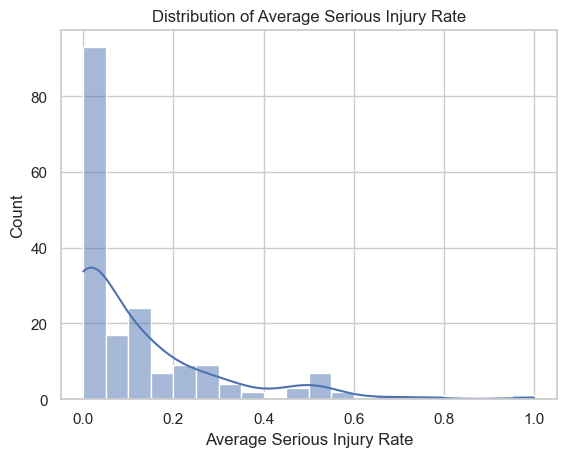

In [625]:
sns.histplot(risk_index_df['Average Serious Injury Rate'], bins=20, kde=True)
plt.title('Distribution of Average Serious Injury Rate')
plt.show()

In [626]:
## figure out the weights?
### reevaluate risk criteria adjust the thresholds by percentiles

Re-do the risk_index function to introduce a weighted scoring system so that the factors with skewed distributions are balanced out:

In [627]:
def risk_index(make_model, risk_index_df):
    # Find the row corresponding to the given Make-Model
    row = risk_index_df.loc[make_model]
   
    if row.empty:
        return "Make-Model not found"

    avg_fatality_rate = row['Average Fatality Rate']
    avg_serious_injury_rate = row['Average Serious Injury Rate']
    avg_fatality_substantial_damage = row['Average Fatality Rate w/ Substantial Damage']
    avg_uninjured_rate = row['Average Uninjured Rate']
    avg_minor_injury = row['Average Minor Injury Rate']

    weights = {
        'fatality_rate': .10,
        'serious_injury_rate': .10,
        'minor_injury_rate': .35,
        'substantial_damage_rate': .10,
        'uninjured_rate': .35
}

    score = (
        weights['fatality_rate'] * (avg_fatality_rate > 0.17) +
        weights['serious_injury_rate'] * (avg_serious_injury_rate > 0.10) +
        weights['substantial_damage_rate'] * (avg_fatality_substantial_damage > 0.03) +
        weights['uninjured_rate'] * (avg_uninjured_rate < 0.60) + 
        weights['minor_injury_rate'] * (avg_minor_injury < 0.13)

    )


    # Determine risk level based on count
    if score > .7:
        # return "High Risk", score
        return f"High Risk, {score}"
    elif score > .4:
        # return "Medium Risk", score
        return f"Medium Risk, {score}"
    else:
        # return "Low Risk", score
        return f"Low Risk, {score}"


In [628]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index
Make-Model,,,,,,
Beech 200,0.595238,0.309524,0.428571,0.047619,0.047619,High Risk
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk
Beech 36,0.500000,0.000000,0.000000,0.000000,0.500000,Medium Risk
Beech 56TC,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk
Beech 58,0.664291,0.214275,0.166642,0.089288,0.032145,Medium Risk
...,...,...,...,...,...,...
Piper PA-38-112,0.500000,0.000000,0.000000,0.500000,0.000000,Low Risk
Piper PA-44-180,0.000000,0.500000,0.000000,0.250000,0.250000,Medium Risk
Piper PA-60,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk


In [629]:
risk_index_df['Risk Index'] = risk_index_df.apply(lambda row: risk_index(row.name, risk_index_df), axis=1)

In [630]:
risk_index_df['Risk Index'].value_counts().sort_values()

Risk Index
Low Risk, 0.1                        2
Low Risk, 0.2                        6
Low Risk, 0.0                        8
High Risk, 1.0                       9
Medium Risk, 0.65                    9
High Risk, 0.9                      15
High Risk, 0.7999999999999999       16
Medium Risk, 0.55                   34
Medium Risk, 0.44999999999999996    34
Low Risk, 0.35                      47
Name: count, dtype: int64

In [631]:
risk_index_df[["Risk Rank", "Risk Value"]] = risk_index_df["Risk Index"].str.split(",", expand=True)

In [632]:
# Turn the objects into floats
risk_index_df['Risk Value'] = risk_index_df['Risk Value'].astype(float)
risk_index_df['Risk Value']

Make-Model
Beech 200          0.90
Beech 35           0.35
Beech 36           0.80
Beech 56TC         0.35
Beech 58           0.55
                   ... 
Piper PA-38-112    0.35
Piper PA-44-180    0.55
Piper PA-60        0.35
Piper PA23-250     0.55
Piper PA31-350     0.45
Name: Risk Value, Length: 180, dtype: float64

In [633]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
Make-Model,,,,,,,,
Beech 200,0.595238,0.309524,0.428571,0.047619,0.047619,"High Risk, 0.9",High Risk,0.90
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
Beech 36,0.500000,0.000000,0.000000,0.000000,0.500000,"High Risk, 0.7999999999999999",High Risk,0.80
Beech 56TC,1.000000,0.000000,0.000000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
Beech 58,0.664291,0.214275,0.166642,0.089288,0.032145,"Medium Risk, 0.55",Medium Risk,0.55
...,...,...,...,...,...,...,...,...
Piper PA-38-112,0.500000,0.000000,0.000000,0.500000,0.000000,"Low Risk, 0.35",Low Risk,0.35
Piper PA-44-180,0.000000,0.500000,0.000000,0.250000,0.250000,"Medium Risk, 0.55",Medium Risk,0.55
Piper PA-60,1.000000,0.000000,0.000000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35


In [634]:
risk_index_df.drop(columns=["Risk Index"], inplace=True)

In [635]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Rank,Risk Value
Make-Model,,,,,,,
Beech 200,0.595238,0.309524,0.428571,0.047619,0.047619,High Risk,0.90
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk,0.35
Beech 36,0.500000,0.000000,0.000000,0.000000,0.500000,High Risk,0.80
Beech 56TC,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk,0.35
Beech 58,0.664291,0.214275,0.166642,0.089288,0.032145,Medium Risk,0.55
...,...,...,...,...,...,...,...
Piper PA-38-112,0.500000,0.000000,0.000000,0.500000,0.000000,Low Risk,0.35
Piper PA-44-180,0.000000,0.500000,0.000000,0.250000,0.250000,Medium Risk,0.55
Piper PA-60,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk,0.35


In [636]:
risk_index_df = risk_index_df.reset_index()
risk_index_df['New_Index'] = range(1, len(risk_index_df) + 1)
risk_index_df = risk_index_df.set_index('New_Index')
risk_index_df['Aircraft Damage'] = filtered_dff['Aircraft Damage']
risk_index_df['Engine Type'] = filtered_dff['Engine Type']
risk_index_df['Number Of Engines'] = filtered_dff['Number Of Engines']

In [637]:
risk_index_df

,Make-Model,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Rank,Risk Value,Aircraft Damage,Engine Type,Number Of Engines
New_Index,,,,,,,,,,,
1,Beech 200,0.595238,0.309524,0.428571,0.047619,0.047619,High Risk,0.90,Substantial,Turbo Prop,2.0
2,Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk,0.35,Destroyed,Reciprocating,2.0
3,Beech 36,0.500000,0.000000,0.000000,0.000000,0.500000,High Risk,0.80,Destroyed,Reciprocating,2.0
4,Beech 56TC,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk,0.35,Substantial,Turbo Prop,2.0
5,Beech 58,0.664291,0.214275,0.166642,0.089288,0.032145,Medium Risk,0.55,Substantial,Turbo Prop,2.0
...,...,...,...,...,...,...,...,...,...,...,...
176,Piper PA-38-112,0.500000,0.000000,0.000000,0.500000,0.000000,Low Risk,0.35,Substantial,Reciprocating,1.0
177,Piper PA-44-180,0.000000,0.500000,0.000000,0.250000,0.250000,Medium Risk,0.55,Substantial,Reciprocating,1.0
178,Piper PA-60,1.000000,0.000000,0.000000,0.000000,0.000000,Low Risk,0.35,Substantial,Reciprocating,1.0


In [638]:
turbo_fan_df = risk_index_df[risk_index_df['Engine Type'] == 'Turbo Fan']
lowest_risk_scores_turbo_fan = turbo_fan_df.sort_values(by='Risk Value', ascending=True)
print(lowest_risk_scores_turbo_fan[['Make-Model', 'Risk Value']].head(10))

                Make-Model  Risk Value
New_Index                             
160           Piper PA-31T        0.35
157        Piper PA-31-310        0.45
134            Mooney M20M        0.55
142        Piper PA-23-250        0.65


In [639]:
turbo_fan_dff = filtered_df[filtered_df['Engine Type'] == 'Turbo Fan']
lowest_risk_scores_turbo_fann = turbo_fan_dff.sort_values(by='Fatal Injury Ratio', ascending=True)
print(lowest_risk_scores_turbo_fann[['Make-Model', 'Fatal Injury Ratio']].head(10))

             Make-Model  Fatal Injury Ratio
Event Date                                 
2006-05-16   Cessna 525            0.047022
2005-07-15  Cessna 525A            0.059656
2006-01-24   Cessna 560            0.571429
1982-11-18   Cessna 551            1.000000


In [640]:
low_risk_df = risk_index_df[risk_index_df['Risk Rank'] == 'Low Risk']
low_risk_filtered = low_risk_df[['Make-Model', 'Risk Value']]
low_risk_filtered['Risk Value'].value_counts()

Risk Value
0.35    47
0.00     8
0.20     6
0.10     2
Name: count, dtype: int64

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_5897/1695476849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Aircraft Damage', y='Risk Value', data=risk_index_dff, order=['Destroyed', 'Substantial', 'Minor'], palette='Set2')


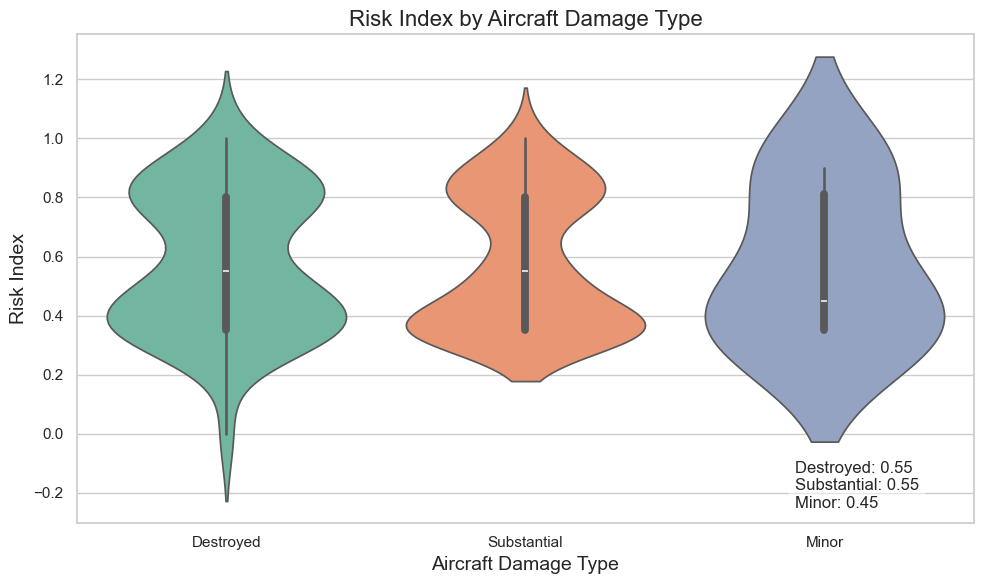

In [641]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Aircraft Damage', y='Risk Value', data=risk_index_dff, order=['Destroyed', 'Substantial', 'Minor'], palette='Set2')


median_values = risk_index_dff.groupby('Aircraft Damage')['Risk Value'].median()


median_text = '\n'.join([f'{damage_type}: {median_values[damage_type]:.2f}' for damage_type in ['Destroyed', 'Substantial', 'Minor']])


plt.text(1.9, min(risk_index_dff['Risk Value']) - 0.25, median_text, bbox=dict(facecolor='white', alpha=0.5), fontsize=12)

plt.title('Risk Index by Aircraft Damage Type', fontsize=16)
plt.xlabel('Aircraft Damage Type', fontsize=14)
plt.ylabel('Risk Index', fontsize=14)

plt.tight_layout()
plt.show()


/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_5897/1317396836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Engine Type', y='Risk Value', data=risk_index_df, order=['Reciprocating', 'Turbo Prop', 'Turbo Fan'], palette='Set2', ax=ax)


KeyError: 'Reciprocating Mean'

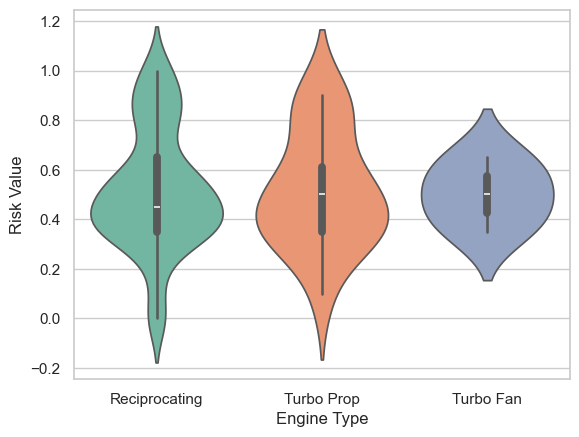

<Figure size 1000x600 with 0 Axes>

In [642]:
fig, ax = plt.subplots()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Engine Type', y='Risk Value', data=risk_index_df, order=['Reciprocating', 'Turbo Prop', 'Turbo Fan'], palette='Set2', ax=ax)

median_values = risk_index_df.groupby('Engine Type')['Risk Value'].median()

median_text = '\n'.join([f'{engine_type}: {median_values[engine_type]:.2f}' for engine_type in ['Reciprocating Mean', 'Turbo Prop Mean', 'Turbo Fan Mean']])

ax.text(1.5, min(risk_index_df['Risk Value']) - 0.2, median_text, bbox=dict(facecolor='white', alpha=0.5), fontsize=12)


ax.set_title('Risk Index by Engine Type', fontsize=16)
ax.set_xlabel('Engine Type', fontsize=14)
ax.set_ylabel('Risk Index', fontsize=14)

plt.tight_layout()
plt.show()

fig.savefig("temp")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Aircraft': ['Piper PA-31T', 'Piper PA-31-310', 'Mooney M20M', 'Piper PA-23-250'],
    'Risk Index': [0.35, 0.45, 0.55, 0.90]
    }
df = pd.DataFrame(data)

df_heatmap = df.set_index('Aircraft').T

plt.figure(figsize=(10, 2))
sns.heatmap(df_heatmap, cmap="RdYlGn_r", annot=True, linewidths=0.5, fmt=".2f")

plt.title("Risk Index Heatmap by Aircraft (Green to Red)", fontsize=16)

plt.tight_layout()
plt.show()


/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_5897/547814506.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


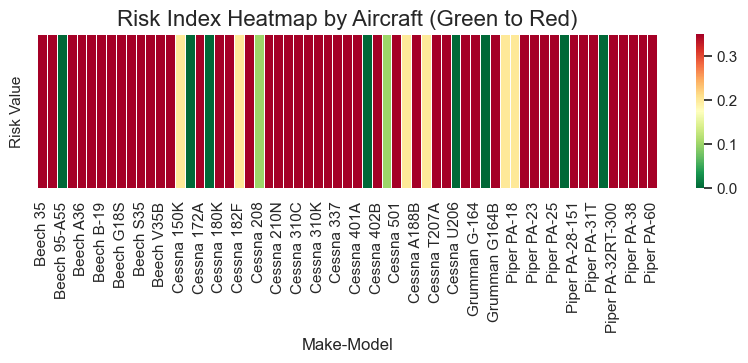

In [660]:

data = (low_risk_filtered)
df = pd.DataFrame(data)

df_heatmap = df.set_index('Make-Model').T

plt.figure(figsize=(10, 2))
sns.heatmap(df_heatmap, cmap="RdYlGn_r", annot=False, linewidths=0.5, fmt=".2f")

plt.title("Risk Index Heatmap by Aircraft (Green to Red)", fontsize=16)

plt.tight_layout()
plt.show()

In [673]:
low_risk_filtered.loc[:, 'Engine Type'] = risk_index_df['Engine Type']
low_risk_filtered

,Make-Model,Risk Value,Engine Type
New_Index,,,
2,Beech 35,0.35,Reciprocating
4,Beech 56TC,0.35,Turbo Prop
8,Beech 95-A55,0.00,Reciprocating
13,Beech A23-19,0.35,Reciprocating
14,Beech A36,0.35,Turbo Prop
...,...,...,...
171,Piper PA-32RT-300,0.35,Reciprocating
173,Piper PA-34-200,0.35,Reciprocating
175,Piper PA-38,0.35,Turbo Prop


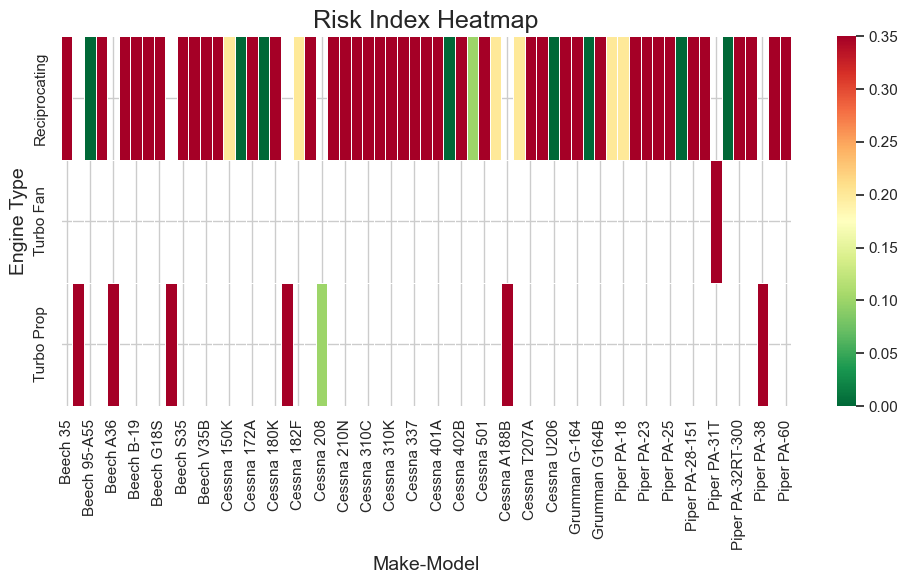

In [676]:

df_heatmap = low_risk_filtered.pivot(index='Engine Type', columns='Make-Model', values='Risk Value')

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, cmap="RdYlGn_r", annot=False, linewidths=0.5, fmt=".2f")

plt.title("Risk Index Heatmap", fontsize=18)
plt.xlabel("Make-Model", fontsize=14)
plt.ylabel("Engine Type", fontsize=14)

plt.tight_layout()
plt.show()



In [697]:
risk_index_df.to_csv('risk_index.csv')

In [700]:
low_risk_filtered.to_csv('low_risk_filtered.csv')